In [47]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

import pandas as pd
import pylab as pl
import numpy as np


In [18]:
base_url="birds.csv"
birds_data  = pd.read_csv(base_url)

In [21]:
birds_data.head()

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


In [22]:
birds_data.describe()

,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
count,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000
mean,28.536682,35.441986,327.938262,667.009752,58.557901,67.524492
std,20.319887,27.539772,779.680106,1655.682564,104.602369,126.673177
min,7.000000,8.900000,2.000000,3.000000,8.000000,10.600000
25%,13.750000,16.000000,18.000000,28.000000,23.000000,25.000000
50%,20.500000,25.000000,55.000000,89.000000,38.000000,42.000000
75%,39.000000,46.000000,332.000000,593.000000,72.750000,83.000000
max,138.000000,180.000000,9200.000000,14300.000000,1800.000000,2300.000000


In [24]:
cdf = birds_data[['MinLength','MaxLength','MinBodyMass','MaxBodyMass','MinWingspan']]
cdf.head()

,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan
0,47.0,56.0,652.0,1020.0,76.0
1,45.0,53.0,712.0,1050.0,85.0
2,64.0,79.0,2050.0,4050.0,135.0
3,57.3,64.0,1066.0,1567.0,113.0
4,64.0,81.0,1930.0,3310.0,130.0


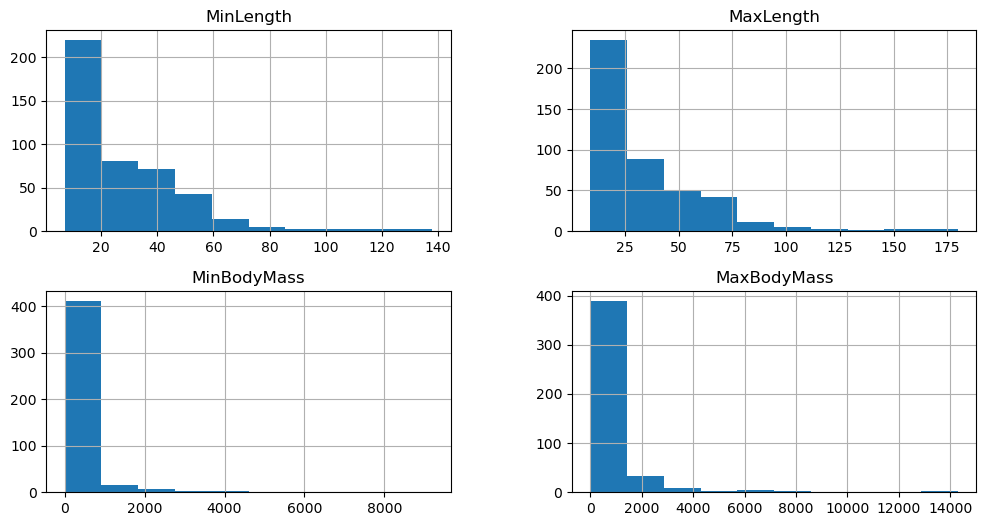

In [25]:
plt.rcParams['figure.figsize'] = (12,6)

viz = cdf[['MinLength','MaxLength','MinBodyMass','MaxBodyMass']]
viz.hist()
plt.show()

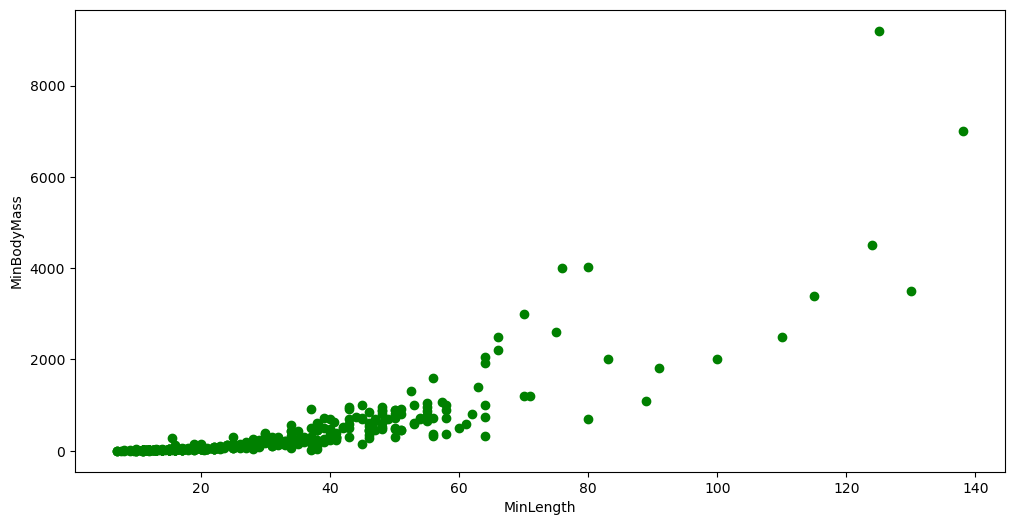

In [26]:
plt.scatter(cdf.MinLength, cdf.MinBodyMass, color="green")
plt.xlabel("MinLength")
plt.ylabel("MinBodyMass")
plt.show()

<Axes: xlabel='MinLength', ylabel='MinBodyMass'>

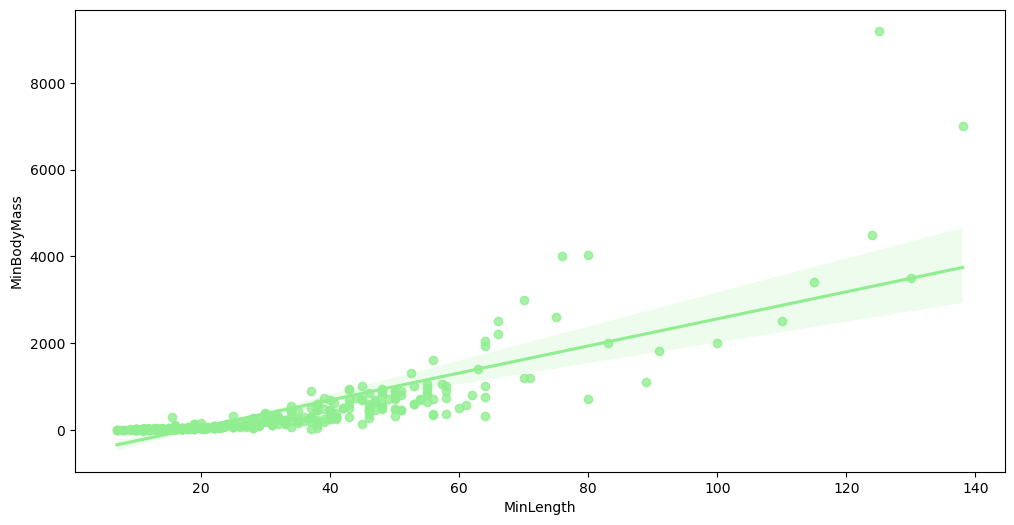

In [29]:
import seaborn as sns

sns.regplot(x=birds_data['MinLength'], y=birds_data['MinBodyMass'],color="lightgreen")

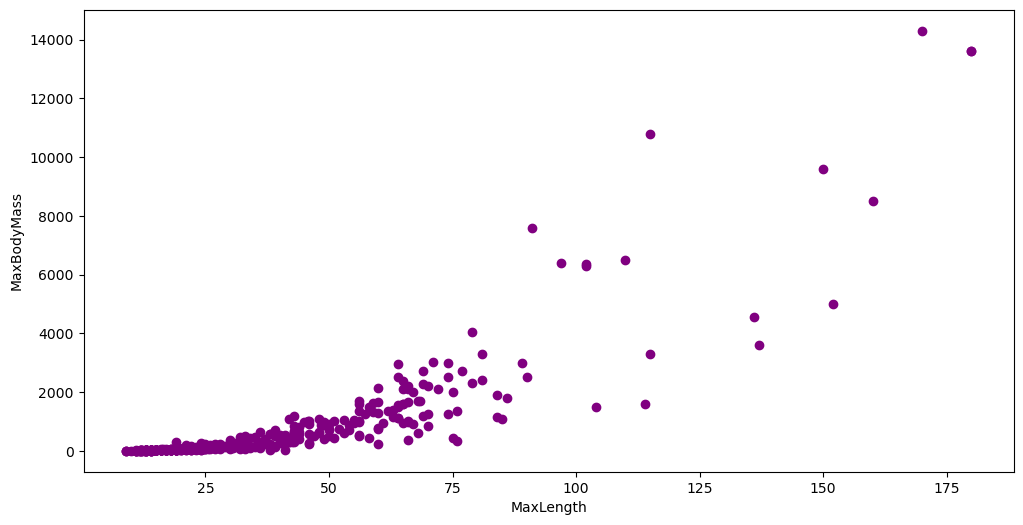

In [30]:
plt.scatter(cdf.MaxLength, cdf.MaxBodyMass, color="purple")
plt.xlabel("MaxLength")
plt.ylabel("MaxBodyMass")
plt.show()

<Axes: xlabel='MaxLength', ylabel='MaxBodyMass'>

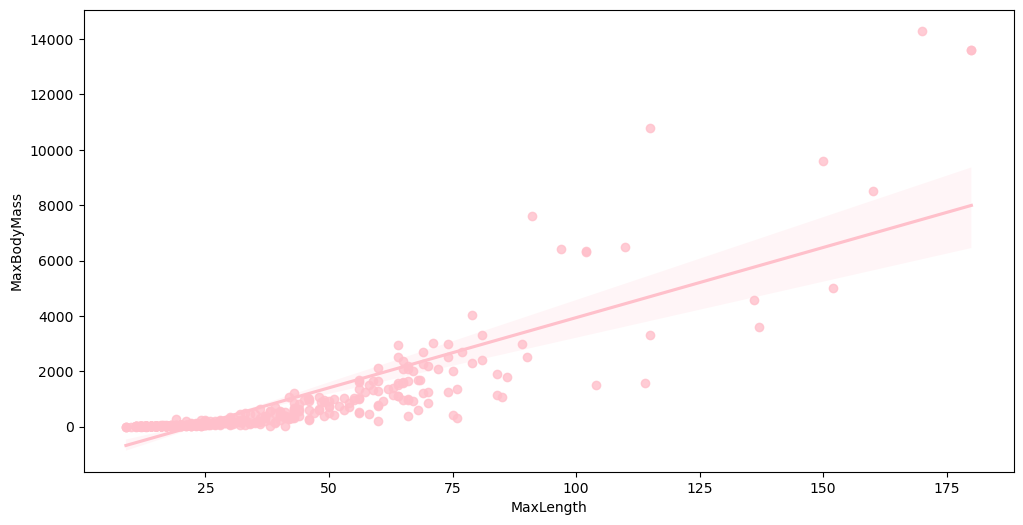

In [31]:
import seaborn as sns

sns.regplot(x=birds_data['MaxLength'], y=birds_data['MaxBodyMass'],color="pink")

In [35]:
msk = np.random.rand(len(birds_data)) < 0.5
train = cdf[msk]
test = cdf[~msk]

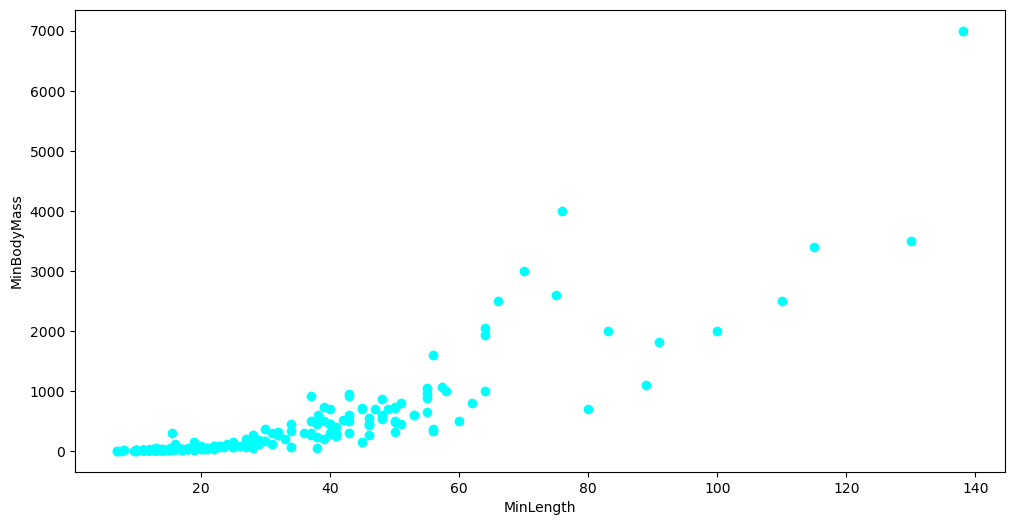

In [36]:
plt.scatter(train.MinLength, train.MinBodyMass, color="cyan")
plt.xlabel("MinLength")
plt.ylabel("MinBodyMass")
plt.show()

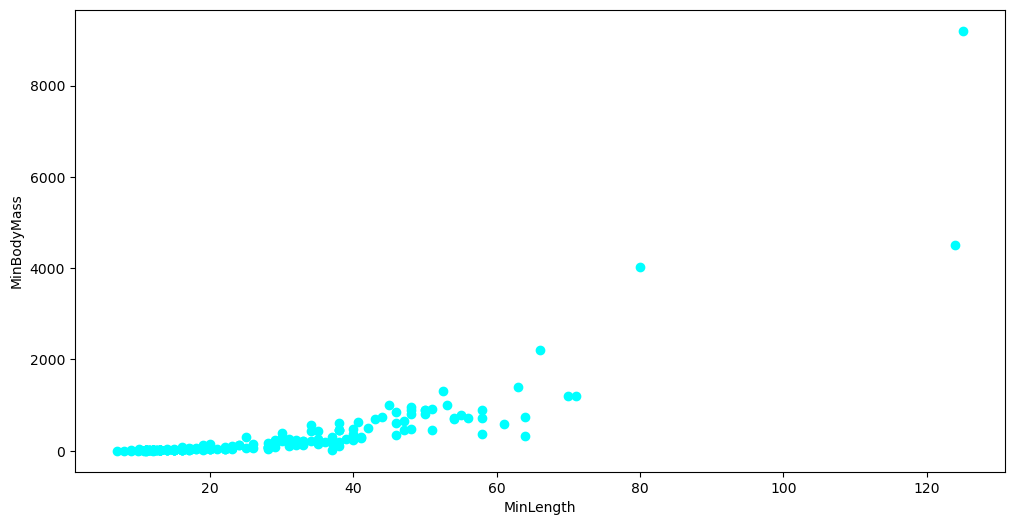

In [37]:
plt.scatter(test.MinLength, test.MinBodyMass, color="cyan")
plt.xlabel("MinLength")
plt.ylabel("MinBodyMass")
plt.show()

In [39]:
# Bağımsız değişkenleri (X) ve bağımlı değişkeni (y) belirleme
X = cdf[['MinLength', 'MaxLength', 'MinBodyMass', 'MaxBodyMass']]
y = cdf['MinWingspan']

In [40]:
# Basit Regresyon
# Önce, tek bir özellik kullanarak basit bir regresyon modeli oluşturacağız (örneğin, MinLength)
X_simple = cdf[['MinLength']]
model_simple = LinearRegression()
model_simple.fit(X_simple, y)

LinearRegression()

Text(0, 0.5, 'MinWingspan')

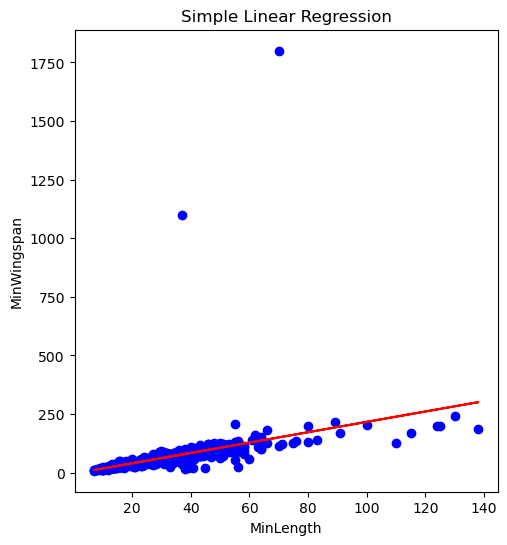

In [46]:
plt.figure(figsize=(12, 6))

# Simple Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(X_simple, y, color='blue')
plt.plot(X_simple, model_simple.predict(X_simple), color='red')
plt.title('Simple Linear Regression')
plt.xlabel('MinLength')
plt.ylabel('MinWingspan')


In [41]:
# Multiple Linear Regresyon
model_multiple = LinearRegression()
model_multiple.fit(X, y)

LinearRegression()

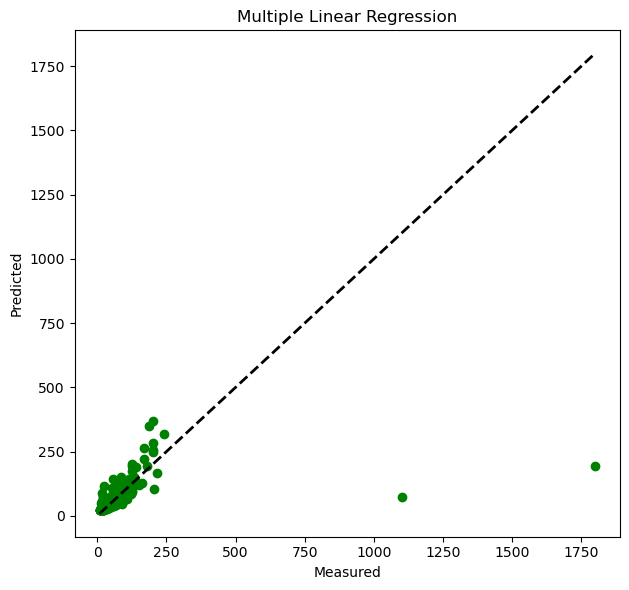

In [44]:
plt.subplot(1, 2, 2)
plt.scatter(y, model_multiple.predict(X), color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title('Multiple Linear Regression')
plt.xlabel('Measured')
plt.ylabel('Predicted')

plt.tight_layout()

In [54]:
X_simple = cdf['MinLength']  # independent variable
y = cdf['MinWingspan']       # the dependent variable
# Mean
x_mean = np.mean(X_simple)
y_mean = np.mean(y)

# (beta1 and beta0)
beta1 = np.sum((X_simple - x_mean) * (y - y_mean)) / np.sum((X_simple - x_mean)**2)
beta0 = y_mean - beta1 * x_mean

# predictions
predictions_simple_without_sklearn = beta0 + beta1 * X_simple
print("Beta0:", beta0)
print("Beta1:", beta1)

Beta0: -4.541152700567245
Beta1: 2.2111559433109567


In [48]:
predictions_simple = model_simple.predict(X_simple)
predictions_multiple = model_multiple.predict(X)

In [49]:
# MAE - Mean Absolute Error
mae_simple = mean_absolute_error(y, predictions_simple)
mae_multiple = mean_absolute_error(y, predictions_multiple)

In [50]:
# MSE - Mean Squared Error
mse_simple = mean_squared_error(y, predictions_simple)
mse_multiple = mean_squared_error(y, predictions_multiple)

In [51]:
# RMSE - Root Mean Squared Error
rmse_simple = np.sqrt(mse_simple)
rmse_multiple = np.sqrt(mse_multiple)

In [53]:
print("Simple Regression:")
print("MAE:", mae_simple)
print("MSE:", mse_simple)
print("RMSE:", rmse_simple)
print("\nMultiple Regession")
print("MAE:", mae_multiple)
print("MSE:", mse_multiple)
print("RMSE:", rmse_multiple)

Simple Regression:
MAE: 18.15956501377587
MSE: 8902.76923786577
RMSE: 94.3544871103954

Multiple Regession
MAE: 19.561560914831105
MSE: 8717.08057342213
RMSE: 93.36530711898361
